In [21]:
from sklearn import datasets

In [22]:
#Load dataset - this data is stored in dictionary format
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [23]:
#Description of the data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
#Defining X and y
X=iris['data'][:, (2,3)]
y=iris['target']

In [39]:
#Declaring bias term in X 
import numpy as np
X_with_bias=np.c_[np.ones(len(X)),X]     #np.c_ -> Concatenates the slices

In [40]:
np.random.seed(2042)              #to choose the same data every time the model is trained

In [41]:
#Spliting the dataset into train-validation-test set
test_ratio=0.2
valid_ratio=0.2
total_size=len(X_with_bias)

test_size=int(total_size*test_ratio)
valid_size=int(total_size*valid_ratio)
train_size=total_size - test_size - valid_size

rnd_indices=np.random.permutation(total_size)                     #To shuffle up the data for even distribution among test, validation and train split

X_train=X_with_bias[rnd_indices[:train_size]]
y_train=y[rnd_indices[:train_size]]
X_valid=X_with_bias[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
X_test=X_with_bias[rnd_indices[-test_size:]]
y_test=y[rnd_indices[-test_size:]]

In [42]:
print(y_train)

[0 1 2 1 1 0 1 1 1 0 1 2 0 1 1 2 1 1 0 2 1 1 1 2 0 0 0 2 0 1 2 0 2 1 1 2 1
 0 0 1 2 2 2 2 0 2 0 2 2 2 2 0 0 1 1 2 0 0 1 0 2 0 1 1 2 2 2 0 0 0 2 1 2 1
 0 1 0 1 2 2 1 0 2 2 0 2 0 0 0 0]


In [43]:
#As we see above the target is having values of classes 0,1,2 but we need it to be 1 if the class is accepted else 0
def one_hot(y):
    n_classes=y.max()+1
    #print(n_classes)
    m=len(y)
    Y_one_hot=np.zeros((m,n_classes))
    #print([np.arange(m),y])
    Y_one_hot[np.arange(m), y] = 1               #this will populate [0,2] with 1, [1,2] with 1, [2,1] with 1 and so on
    return Y_one_hot

In [44]:
one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [45]:
#Applying one-hot on all the 3 sets
Y_train_one_hot = one_hot(y_train)
Y_valid_one_hot = one_hot(y_valid)
Y_test_one_hot = one_hot(y_test)

In [46]:
#According to softmax formula - exp(s(x))[suffix k]/sum(exp(s(x))[suffix]
def softmax(logits):
    exps=np.exp(logits)
    exp_sums=np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [47]:
n_inputs=X_train.shape[1]             # 3 -> 2 features + bias_term
n_outputs=len(np.unique(y_train))     # 3 -> (3 iris classes)

In [48]:
#Creating the model
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradient

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918715
5000 0.3956780375390374


In [49]:
theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [50]:
logits=X_valid.dot(theta)
Y_prob=softmax(logits)
y_predict= np.argmax(Y_prob, axis=1)
print(y_predict)
print(y_valid)

accuracy_score= np.mean(y_predict==y_valid)
accuracy_score

[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 1]
[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]


0.9666666666666667

In [51]:
#Adding regularization
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))                                   #Ignoring the bias term
    loss = xentropy_loss + alpha * l2_loss
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient                                       #we don't regularize the first element of Theta since this corresponds to the bias term

0 6.629842469083912
500 0.9686589842249377
1000 0.7776844272207595
1500 0.6814080407571755
2000 0.6283713718788265
2500 0.5963150854603225
3000 0.575245519589463
3500 0.5604093954580108
4000 0.5493870445680064
4500 0.5408567207176893
5000 0.5340463324849026


In [52]:
logits=X_valid.dot(theta)
Y_prob=softmax(logits)
y_predict= np.argmax(Y_prob, axis=1)
print(y_predict)
print(y_valid)

accuracy_score= np.mean(y_predict==y_valid)
accuracy_score

[0 2 0 0 1 2 2 0 0 0 1 2 2 2 1 1 2 1 2 1 0 2 2 2 2 0 0 1 1 2]
[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]


0.9

In [53]:
#Adding early stopping condition
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits=X_train.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))                                   #Ignoring the bias term
    loss = xentropy_loss + alpha * l2_loss
    error = Y_prob - Y_train_one_hot
    if iter % 500 == 0:
        print (iter, loss)
    gradient = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient                                       #we don't regularize the first element of Theta since this corresponds to the bias term
    
    logits=X_valid.dot(theta)
    Y_prob=softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_prob + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iter % 500 == 0:
        print (iter, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iter-1, best_loss)
        print(iter,loss,'early stopping')
        break

0 5.401014020496038
0 5.4044551826526
500 0.9057746237871949
500 0.8975143813565174
1000 0.7546451358045128
1000 0.7638778281807005
1500 0.677898020634155
1500 0.6964911465199841
2000 0.633156395629338
2000 0.657185425626267
2500 0.6040928899583046
2500 0.6315140938560632
3000 0.5836979468114087
3000 0.6133729210488515
3500 0.5685796152886732
3500 0.5998397415753632
4000 0.556916593772195
4000 0.5893513823642934
4500 0.5476455924677358
4500 0.5809927641590672
5000 0.5401037070007071
5000 0.5741892349628452


In [54]:
#Test score
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

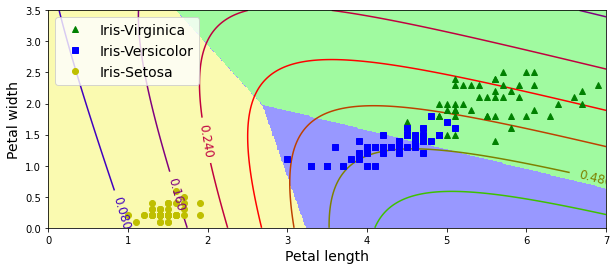

In [55]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [72]:
#Applying the iris dataset on Scikit library linearSVC and SVC
X=iris['data'][:, (2,3)]
y=iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [73]:
#LinearSVC - not using Pipeline as using Pipeline will limit you to use models
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


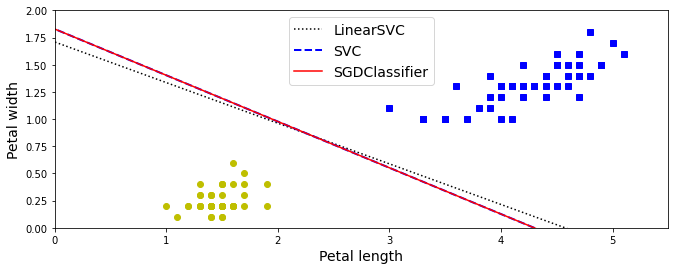

In [84]:
#Plot the 3 models -
w1=-lin_clf.coef_[0,0]/lin_clf.coef_[0,1]
b1=-lin_clf.intercept_[0]/lin_clf.coef_[0,1]
w2=-svm_clf.coef_[0,0]/svm_clf.coef_[0,1]
b2=-svm_clf.intercept_[0]/svm_clf.coef_[0,1]
w3=-sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b3=-sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

#Transform the decision boundary lines back to the original scale
line1=scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2=scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3=scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.show()